In [1]:
# Steps of the project
#1. Import the data
#2. Analyze, Understand and Clean the data
#3. Split the data to train and test
#4. Pick the model and test the data to the model to predict the attrition test
#5. Impove - Optimize - Refine the code

### Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Data Preprocessing

#### Summary Statistics

In [7]:
print('Summary Statistics')
print(df.describe(include = 'all'))

Summary Statistics
                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     

#### Count Missing Values

In [9]:
print("Count of Missing Values")
print(df.isnull().sum())

Count of Missing Values
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRo

#### Check for Duplicate Rows

In [11]:
count = df.duplicated().sum()
print(f"The number of duplicate rows is: {count}")

The number of duplicate rows is: 0


#### Unique Values Per Column

In [13]:
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLas

#### Hot Encoding  

In [15]:
# Change the data in order to feed it to the model
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if str(x).strip().lower() == 'male' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if str(x).strip().lower() == 'y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

In [16]:
df = df.join(pd.get_dummies(df['BusinessTravel']).astype(bool)).drop('BusinessTravel',axis=1)
df = df.join(pd.get_dummies(df['Department'],prefix = 'Department').astype(bool)).drop('Department',axis=1)
df = df.join(pd.get_dummies(df['EducationField'],prefix = 'Education').astype(bool)).drop('EducationField',axis=1)
df = df.join(pd.get_dummies(df['JobRole'],prefix = 'Role').astype(bool)).drop('JobRole',axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'],prefix = 'Status').astype(bool)).drop('MaritalStatus',axis=1)

In [17]:
# Encode the values when X is True changes to 1 when X is False changes to 0
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)

C:\Users\user\AppData\Local\Temp\ipykernel_2460\1093997694.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)


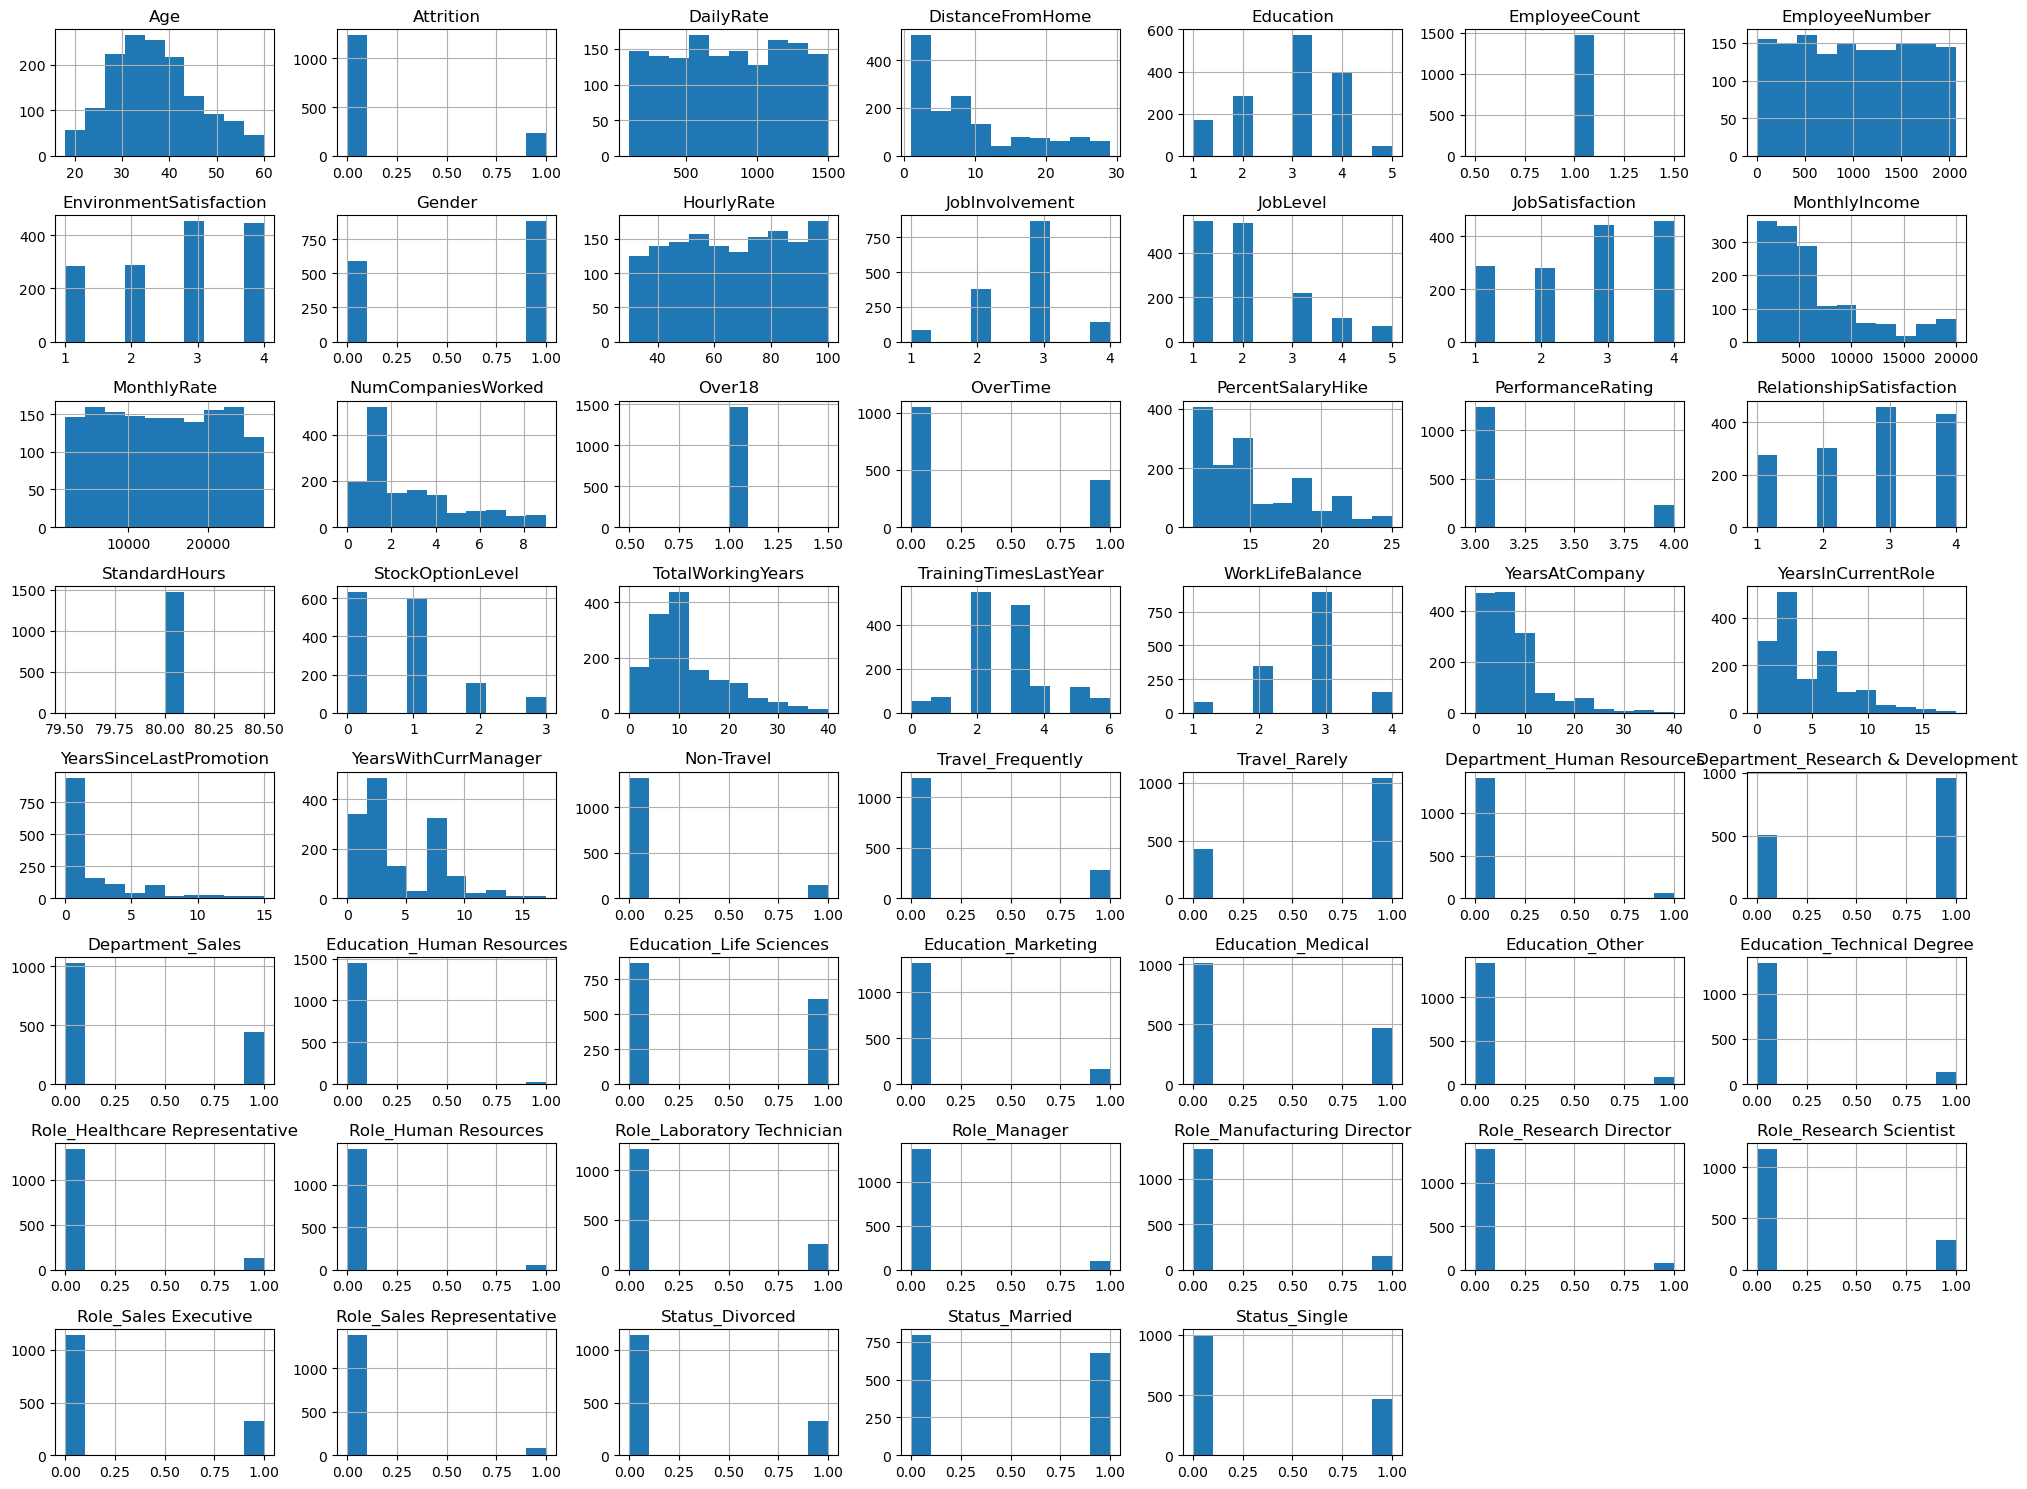

In [18]:
df.hist(figsize = (20,15))
plt.tight_layout()
plt.show()

# Not Useful Columns 

In [20]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)

### Model Training Section

In [22]:
X, y = df.drop('Attrition', axis = 1), df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier(n_jobs = -1)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

## Predictions on Testing Set

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Adding Predictions to the set
X_test['Attrition_Prediction'] = y_pred

In [26]:
X_test_with_results = X_test.copy()
X_test_with_results['Actual_Attrition'] = y_test.values
X_test_with_results.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single,Attrition_Prediction,Actual_Attrition
905,29,694,1,3,1264,4,0,87,2,4,...,0,1,0,0,0,1,0,0,0,0
435,33,1277,15,1,582,2,1,56,3,3,...,0,0,0,0,0,0,1,0,0,1
851,56,718,4,4,1191,4,0,92,3,5,...,0,0,0,0,0,1,0,0,0,0
1027,34,401,1,3,1447,4,0,86,2,1,...,0,0,0,0,0,0,1,0,0,0
485,27,798,6,4,655,1,0,66,2,1,...,0,0,1,0,0,1,0,0,0,0


# Model Accuracy

In [50]:
testing_data_accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy of the model on the testing set is: ",testing_data_accuracy)

The accuracy of the model on the testing set is:  0.8503401360544217


In [56]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

print(cm)
accuracy_score(y_test, y_pred)

True Positives (TP): 5
True Negatives (TN): 245
False Positives (FP): 3
False Negatives (FN): 41
[[245   3]
 [ 41   5]]


0.8503401360544217